# Cours 4 : Monte-Carlo vs rectangles en dimension 5

Comparer le temps de calcul de la méthode des rectangles et de la méthode de Monte Carlo en dimension 5 avec la fonction f donnée.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# fonction dont il faut calculer l'integrale
def f(u, v, w, x, y):
    return np.exp(u) * 2*v * np.sin(w) * np.cos(x) * (1 / (y+1))

In [3]:
# valeur de l'integrale 
a, b = 0, 1
integrale_f = (
    (np.exp(b) - np.exp(a)) *
    (b**2 - a**2) *
    (-np.cos(b) + np.cos(a))  *
    (np.sin(b) -  np.sin(a)) * 
    (np.log(1+b) - np.log(1+a))
    )
integrale_f

0.46071391454414323

In [4]:
# utiliser une liste pour les arguments d'une fonction
arguments = [0, 0.5, np.pi/2, np.pi/4, 1]
f(*arguments)

0.3535533905932738

##### Methode des rectangles pour le calcul de l'intégrale de f

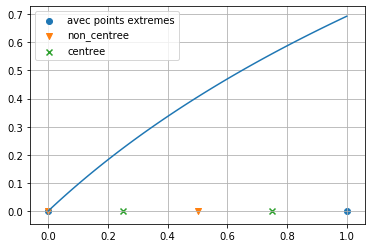

In [5]:
# definir la grille numerique centree pour chaque axe avec n_points
n_points = 2
plt.figure()
plt.plot(np.linspace(a, b, 100), np.log(1+np.linspace(a, b, 100)))

# grille standard utilisant np.linspace
grid_1D = np.linspace(a, b, n_points)
plt.scatter(grid_1D, np.zeros(n_points), label='avec points extremes')

# grille excluant le point b
grid_1D = np.linspace(a, b, n_points, endpoint=False)
plt.scatter(grid_1D, np.zeros(n_points), label='non_centree', marker='v')

# grille centree
step = grid_1D[1] - grid_1D[0]
grid_1D += 0.5*step # on ajoute la moitie du pas pour que la grille soit centree
grid_1D
plt.scatter(grid_1D, np.zeros(n_points), label='centree', marker='x')
plt.grid()
plt.legend()

In [6]:
# a partir de cette grille en dimension 1,
# on definit la grille en dimension 5
u_grid, v_grid, w_grid, x_grid ,y_grid = np.meshgrid(*[grid_1D.copy() for _ in range(5)])
f'Shapes: u_grid: {u_grid.shape}, v_grid: {v_grid.shape}, ...'

'Shapes: u_grid: (2, 2, 2, 2, 2), v_grid: (2, 2, 2, 2, 2), ...'

In [7]:
# parcourir la grille numerique avec une boucle for
u_grid, v_grid, w_grid, x_grid ,y_grid = u_grid.flatten(), v_grid.flatten(), w_grid.flatten(), x_grid.flatten() ,y_grid.flatten()
for i in range(u_grid.size):
    u, v, w, x, y = u_grid[i], v_grid[i], w_grid[i], x_grid[i] ,y_grid[i]
    print(u, v, w, x, y)
    if i > 10:
        break

0.25 0.25 0.25 0.25 0.25
0.25 0.25 0.25 0.25 0.75
0.25 0.25 0.25 0.75 0.25
0.25 0.25 0.25 0.75 0.75
0.25 0.25 0.75 0.25 0.25
0.25 0.25 0.75 0.25 0.75
0.25 0.25 0.75 0.75 0.25
0.25 0.25 0.75 0.75 0.75
0.75 0.25 0.25 0.25 0.25
0.75 0.25 0.25 0.25 0.75
0.75 0.25 0.25 0.75 0.25
0.75 0.25 0.25 0.75 0.75


In [8]:
# mesurer le temps d'execution de la methode des rectangles et afficher le resultat
def calcul_methode_rectangle():
    integrale_rec = 0
    # a vous d'ecrire
    time.sleep(1)
    return integrale_rec
%time valeur = calcul_methode_rectangle()
print(f'difference : {valeur - integrale_f}')

CPU times: user 1.01 ms, sys: 1.98 ms, total: 2.99 ms
Wall time: 1 s
difference : -0.46071391454414323


##### Methode de Monte-Carlo pour le calcul de l'intégrale de f

In [9]:
# echantilloner variable uniforme sur [a,b]^5 
N = n_points**5
uniform = a + (b-a) * np.random.rand(N, 5)

# parcourir les valeurs echantillonnees
for i in range(N):
    u, v, w, x, y = uniform[i]
    print(u, v, w, x, y)
    if i > 2:
        break

0.9192326412052809 0.3687576948364151 0.8135893616563646 0.22596125349575413 0.4457365537451925
0.06577242998389321 0.9988263514528954 0.7601157396356737 0.7770879889759561 0.08770799705169963
0.7602302767639597 0.913508621794351 0.8029184150782532 0.3489105817124678 0.523844898675351
0.7992007242985195 0.4938877559592152 0.07658594153051346 0.3445465596105608 0.5832506520578788


In [10]:
# mesurer le temps d'execution de la methode de Monte et afficher le resultat
def calcul_methode_monte_carlo():
    integrale_mc = 0
    # a vous d'ecrire
    return integrale_mc
%time valeur = calcul_methode_monte_carlo()
print(f'difference : {valeur - integrale_f}')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs
difference : -0.46071391454414323
